## Netflix Content Strategy Analysis

#### Importing essential libraries for data manipulation, visualization, and handling warnings

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=ImportWarning)

In [97]:
# Load Netflix Content Data (2023) into DataFrame
data = pd.read_csv(r"C:\Users\srava\Desktop\Projects Folder\Netflix python\netflix_content_2023.csv")

In [3]:
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,3/23/2023,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,1/5/2023,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,12/30/2022,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,11/23/2022,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,5/4/2023,"50,30,00,000",English,Movie


In [103]:
# Check for missing values in the entire DataFrame
data.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

In [109]:
# Check the summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [110]:
# data["Hours Viewed"] = pd.to_numeric(data["Hours Viewed"].str.replace(',',''),errors="coerce")
# data["Hours Viewed"].head()

In [111]:
data["Hours Viewed"] = data["Hours Viewed"].replace(',','',regex=True).astype(int)
data[["Title","Hours Viewed"]].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000
1,Ginny & Georgia: Season 2,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000
3,Wednesday: Season 1,507700000
4,Queen Charlotte: A Bridgerton Story,503000000


#### Let’s visualize the distribution of total viewership hours between Shows and Movies:

In [112]:
content_viewership = data.groupby("Content Type")["Hours Viewed"].sum().reset_index()
content_viewership

,Content Type,Hours Viewed
0,Movie,50637800000
1,Show,107764100000


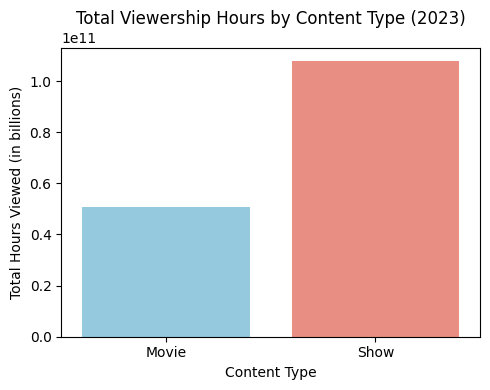

In [113]:
plt.figure(figsize=(5,4))
sns.barplot(data=content_viewership,x="Content Type",y="Hours Viewed",hue="Content Type",palette=["skyblue","salmon"])
plt.title('Total Viewership Hours by Content Type (2023)')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')
plt.tight_layout()

The visualization shows that "shows" dominate Netflix's total viewership hours in 2023, indicating a content strategy focused more on shows than movies.

#### let’s analyze the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption:

In [115]:
language_viewership = data.groupby("Language Indicator")["Hours Viewed"].sum().reset_index().sort_values(by="Hours Viewed",ascending=False)
language_viewership

,Language Indicator,Hours Viewed
0,English,124441700000
3,Korean,15378400000
4,Non-English,10439100000
2,Japanese,7102000000
1,Hindi,926100000
5,Russian,114600000


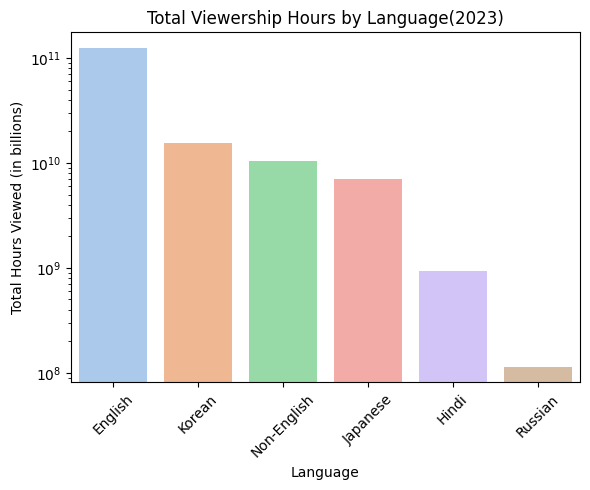

In [116]:
plt.figure(figsize=(6,5))
colors = sns.color_palette("pastel",len(language_viewership))
sns.barplot(data=language_viewership,x="Language Indicator",y="Hours Viewed",palette=colors,hue="Language Indicator")
plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Total Viewership Hours by Language(2023)")
plt.xlabel("Language")
plt.ylabel("Total Hours Viewed (in billions)")
plt.tight_layout()

The visualization shows that English-language content leads Netflix's viewership, with significant consumption of non-English content like Korean, highlighting a diverse content strategy.

####  let's analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months:

In [117]:
data["Release Date"] = pd.to_datetime(data["Release Date"])

In [118]:
#extracts the month as a numeric value
#data["Month"] = data["Release Date"].dt.month

# Extract month names in abbreviated format (e.g., Jan, Feb)
data["Month"] = data["Release Date"].dt.strftime("%b")

In [119]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data["Month"] = pd.Categorical(data["Month"],categories=month_order,ordered=True)

In [120]:
monthly_viewership = data.groupby("Month",observed=False)["Hours Viewed"].sum().reset_index() #.sort_values(by="Month")
monthly_viewership.head()

,Month,Hours Viewed
0,Jan,7271600000
1,Feb,7103700000
2,Mar,7437100000
3,Apr,6865700000
4,May,7094600000


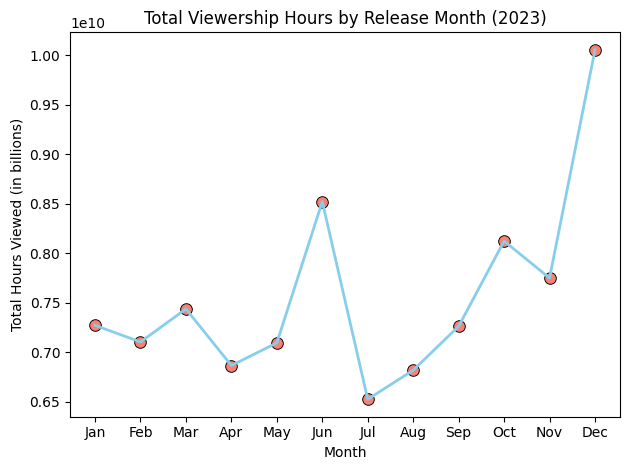

In [121]:
sns.lineplot(data= monthly_viewership,x="Month",y="Hours Viewed",color="skyblue",linewidth=2 )
sns.scatterplot(data= monthly_viewership,x="Month",y="Hours Viewed",color="salmon",s=70,edgecolor= "black")
plt.title("Total Viewership Hours by Release Month (2023)")
plt.xlabel("Month")
plt.ylabel("Total Hours Viewed (in billions)")
plt.tight_layout()

The graph shows a spike in viewership in June and December, suggesting increased engagement during these months, likely due to strategic releases or seasonal trends, with steady but lower viewership in the middle months.

In [24]:
top_5_titles = data.nlargest(5,"Hours Viewed")
top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000,English,Show,2023-08-31


English-language shows dominate the top viewership. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

#### let’s have a look at the viewership trends by content type:

In [122]:
monthly_viewership_by_type = data.pivot_table(values="Hours Viewed",index="Month",columns="Content Type",aggfunc="sum",observed=False)
monthly_viewership_by_type.head()

Content Type,Movie,Show
Month,,
Jan,2275900000,4995700000
Feb,1654400000,5449300000
Mar,2109400000,5327700000
Apr,2757600000,4108100000
May,2520500000,4574100000


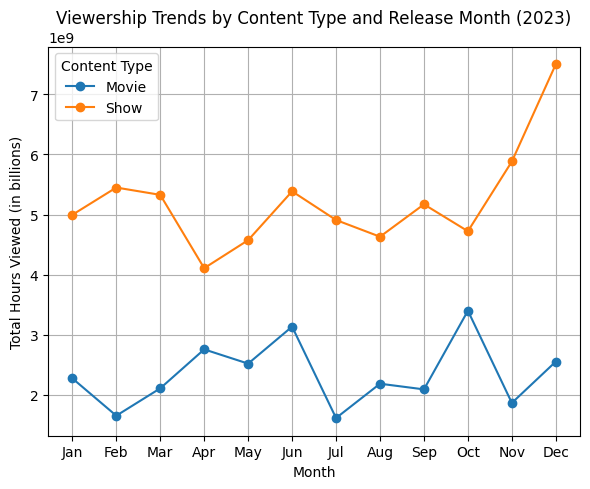

In [123]:
plt.figure(figsize=(6,5))
# Loop through each content type and plot
for content_type in monthly_viewership_by_type.columns:
    plt.plot(monthly_viewership_by_type.index,monthly_viewership_by_type[content_type],marker='o', label=content_type)
# Set the title and labels
plt.title('Viewership Trends by Content Type and Release Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')
# Adding x-axis ticks with month labels
plt.xticks(ticks=range(12), labels=monthly_viewership_by_type.index)
# Adding the legend
plt.legend(title='Content Type')
# Adding grid and tight layout
plt.grid(True)
plt.tight_layout()

The graph compares viewership trends between movies and shows in 2023, showing that shows consistently outperform movies, peaking in December. Movie viewership fluctuates, with spikes in June and October, suggesting occasional increases tied to specific releases or events.

#### let’s explore the total viewership hours distributed across different release seasons:


In [124]:
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Fall"

In [125]:
data["Month_no"] = data["Release Date"].dt.month

In [126]:
data["Season"] = data["Month_no"].apply(get_season)

In [127]:
seasonal_viewership = data.groupby("Season")["Hours Viewed"].sum().reset_index()
seasonal_viewership

,Season,Hours Viewed
0,Fall,90708800000
1,Spring,21397400000
2,Summer,21864600000
3,Winter,24431100000


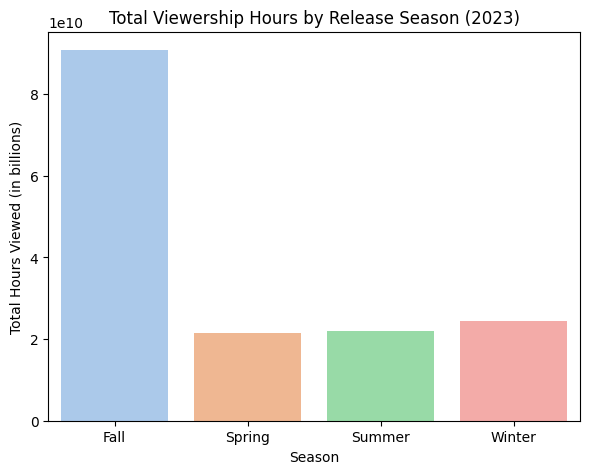

In [128]:
plt.figure(figsize=(6,5))
sns.barplot(data=seasonal_viewership,x="Season",y="Hours Viewed",hue="Season",palette="pastel")
plt.title("Total Viewership Hours by Release Season (2023)")
plt.xlabel("Season")
plt.ylabel("Total Hours Viewed (in billions)")
plt.tight_layout()

The graph shows a peak in viewership hours during Fall, surpassing 80 billion hours, while Winter, Spring, and Summer maintain stable viewership around 20 billion hours, indicating higher engagement in the Fall.

#### let’s analyze the number of content releases and their viewership hours across months:

In [129]:
monthly_releases = data['Month'].value_counts().sort_index()
monthly_viewership = data.groupby('Month',observed=False)['Hours Viewed'].sum()

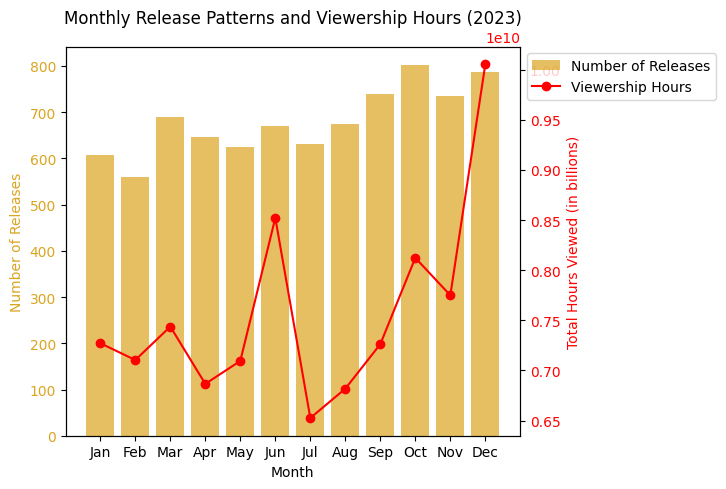

In [130]:
fig, ax1 = plt.subplots(figsize=(6,5))
# Define x positions for each month
x_positions = np.arange(1, 13)  # 1 to 12 for months
# Plot the number of releases on the primary y-axis (left side) as a bar chart
ax1.bar(x_positions, monthly_releases.values, color='goldenrod', alpha=0.7, label='Number of Releases')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Releases', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')

# Set x-axis labels for months at the specified positions
ax1.set_xticks(x_positions)
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create a secondary y-axis for viewership hours (right side)
ax2 = ax1.twinx()
ax2.plot(x_positions, monthly_viewership.values, color='red', marker='o', label='Viewership Hours')
ax2.set_ylabel('Total Hours Viewed (in billions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title('Monthly Release Patterns and Viewership Hours (2023)')
fig.legend(loc=2, bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()

The number of releases remains steady, but viewership hours spike in June and December, suggesting that viewership is influenced more by the timing and appeal of content than by release frequency.

#### let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:

In [131]:
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Month,Month_no,Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,Mar,3.0,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,Jan,1.0,Winter
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,Dec,12.0,Winter
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show,Nov,11.0,Fall
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie,May,5.0,Spring


In [132]:
data["Day"] = data["Release Date"].dt.day_name()

In [133]:
weekday_releases = data["Day"].value_counts().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [135]:
weekday_viewership = data.groupby("Day")["Hours Viewed"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

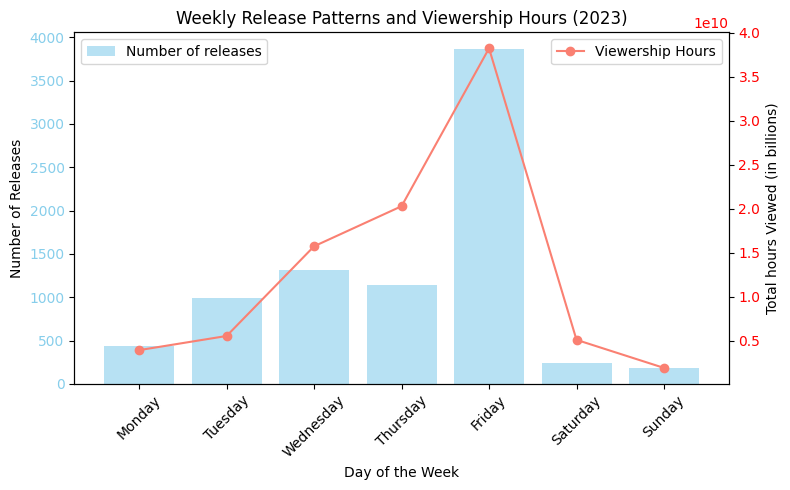

In [136]:
fig,ax1= plt.subplots(figsize=(8,5))
ax1.bar(weekday_releases.index,weekday_releases.values,color="skyblue",alpha=0.6,label="Number of releases")
ax1.set_xlabel("Day of the Week")
ax1.set_ylabel("Number of Releases")
ax1.tick_params(axis="y",labelcolor="skyblue")
plt.xticks(rotation=45)
ax2= ax1.twinx()
ax2.plot(weekday_viewership.index,weekday_viewership.values,color="salmon",marker="o",label="Viewership Hours")
ax2.set_ylabel("Total hours Viewed (in billions)")
ax2.tick_params(axis="y",labelcolor="red")

plt.title("Weekly Release Patterns and Viewership Hours (2023)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
fig.tight_layout()

The graph shows that content releases and viewership peak on Fridays, suggesting Netflix’s strategy to maximize engagement by releasing content ahead of the weekend. Viewership drops on Saturdays and Sundays, indicating that audiences consume new content primarily on Friday.